# Convolutional Networks
## Classifying Handwritten Numbers
### Manipulating The Data

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Using TensorFlow backend.


### Convolutional Network 1
* One convolutional layer
* One pooling layer
* One dense layer with 1000 nodes

In [2]:
from keras import losses
from keras import optimizers

from sklearn.model_selection import train_test_split

x_train_part, x_train_val, y_train_part, y_train_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42, stratify = np.argmax(y_train, axis = 1))

model = Sequential()
first_layer = Conv2D(32, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', input_shape = (28, 28, 1))
model.add(first_layer)
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = losses.categorical_crossentropy, optimizer = optimizers.Adam(), metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.1421 - acc: 0.9576 - val_loss: 0.0474 - val_acc: 0.9857
Epoch 2/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0402 - acc: 0.9877 - val_loss: 0.0412 - val_acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0254 - acc: 0.9919 - val_loss: 0.0463 - val_acc: 0.9837
Epoch 4/10
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0166 - acc: 0.9946 - val_loss: 0.0403 - val_acc: 0.9870
Epoch 5/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0113 - acc: 0.9964 - val_loss: 0.0444 - val_acc: 0.9858
Epoch 6/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0087 - acc: 0.9972 - val_loss: 0.0391 - val_acc: 0.9873
Ep

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              4609000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 4,619,842
Trainable params: 4,619,842
Non-trainable params: 0
_________________________________________________________________


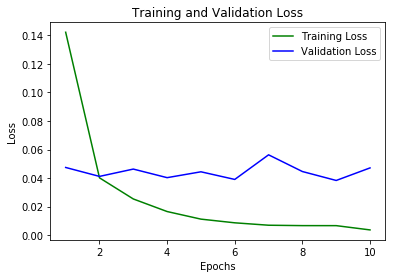

In [4]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss_values, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

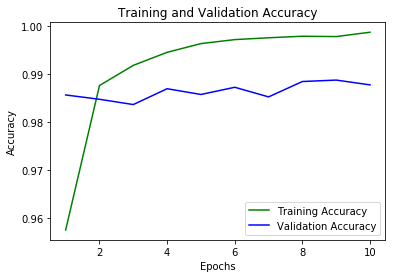

In [5]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict_classes(x_test, batch_size = 128, verbose = 0)
y_pred_test = np.argmax(y_test, axis = 1)

confusion_matrix(y_pred_test, y_pred)

array([[ 976,    0,    0,    1,    0,    0,    2,    0,    1,    0],
       [   1, 1133,    0,    0,    0,    0,    0,    0,    1,    0],
       [   1,    1, 1019,    0,    0,    0,    0,   10,    1,    0],
       [   0,    0,    2,  998,    0,    2,    0,    4,    3,    1],
       [   0,    0,    2,    0,  972,    0,    1,    3,    0,    4],
       [   2,    0,    0,    6,    0,  880,    1,    0,    2,    1],
       [   3,    2,    0,    0,    3,    3,  941,    0,    6,    0],
       [   0,    2,    2,    0,    0,    0,    0, 1023,    1,    0],
       [   3,    0,    3,    0,    0,    0,    0,    3,  961,    4],
       [   3,    2,    0,    6,    9,    1,    0,    7,    6,  975]])

In [7]:
print(classification_report(y_pred_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.97      1.00      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### How many hidden layers are in this network?
In this model, there are 4 hidden layers. They are, in order, the convolutional layer, the pooling layer, the flattening layer, and the 1000-node dense layer.

### How many convolutions are calculated in each convolution layer?
The images are 28 x 28 pixels. Within the first convolutional layer, we specify a kernel size of 5 x 5 with a stride of 1 in each direction. This means that each image has a 5 x 5 box of pixels scanned, moving by 1 pixel after each scan. That 5 x 5 box scans 24 times in each direction, for a total of 576 calculations. Each of these caluclations are passed to the 32 output channels, for a total of 18,432 convolutions in the first layer. These convolutions are then passed to a pooling layer, working with the same logic, except a 2 x 2 box with a stride of 2. So those 32 24 x 24 grids are reduced to 32 12 x 12 grids for a total of 4,608 convolutions in the pooling layer.

### Run a test example through the model and print some of the convolved images from the first layer. Are any features from the image visible?

target: 3
predicted: 5


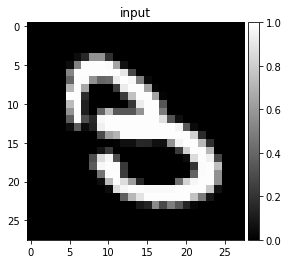

In [8]:
mis_idx = np.where(y_pred_test != y_pred)[0]

from keras import backend as K
import matplotlib.cm as cm

inputs = [K.learning_phase()] + model.inputs

_convout1_f = K.function(inputs, [first_layer.output])
def convout1_f(X):
    return _convout1_f([0] + [X])

from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    plt.colorbar(im, cax=cax)
    
i = mis_idx[0]

X = x_test[i:i+1]
print("target: {}".format(y_pred_test[i]))
print("predicted: {}".format(y_pred[i]))
X.reshape(28, 28)
plt.figure()
plt.title('input')
nice_imshow(plt.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.gray)
plt.show()

C1 shape:  (24, 24, 32)
32
(24, 24)


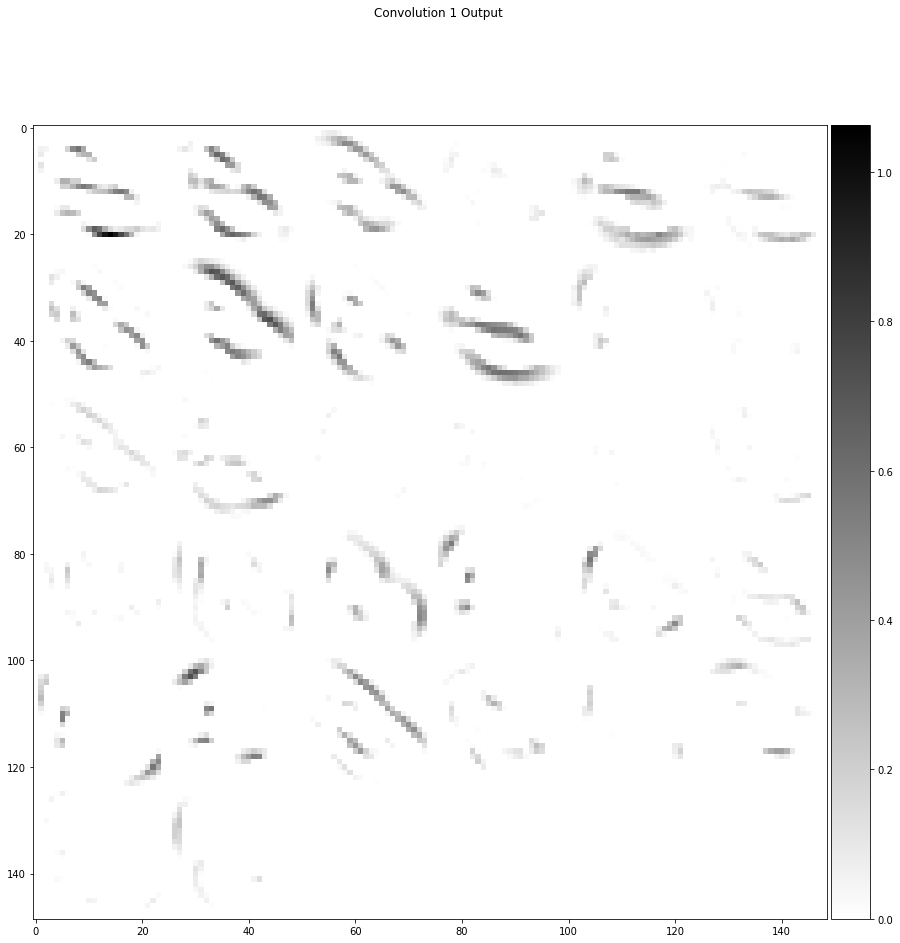

In [9]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    nimgs = imgs.shape[2]
    print(nimgs)
    imshape = imgs.shape[:2]
    print(imshape)
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[:, :,i]
    return mosaic

C1 = convout1_f(X)
C1 = np.squeeze(C1)
print("C1 shape: ", C1.shape)

plt.figure(figsize=(15, 15))
plt.suptitle('Convolution 1 Output')
nice_imshow(plt.gca(), make_mosaic(C1, 6, 6), cmap=cm.binary)
plt.show()

* It seems as though the back of the three is the most prominent feature in these convoluted images
* The curls of the 3 are visible in some of these images. However, of those images, some only show part of the curls, causing the 3 to look more like an 8 or an S
* Some convoluted images are very faded, which tells me the network found little-to-no distinguishing features in those images, holding little weight in the classifications

### Print a few convolution kernels. What kind of pattern is visible?

32
(5, 5)


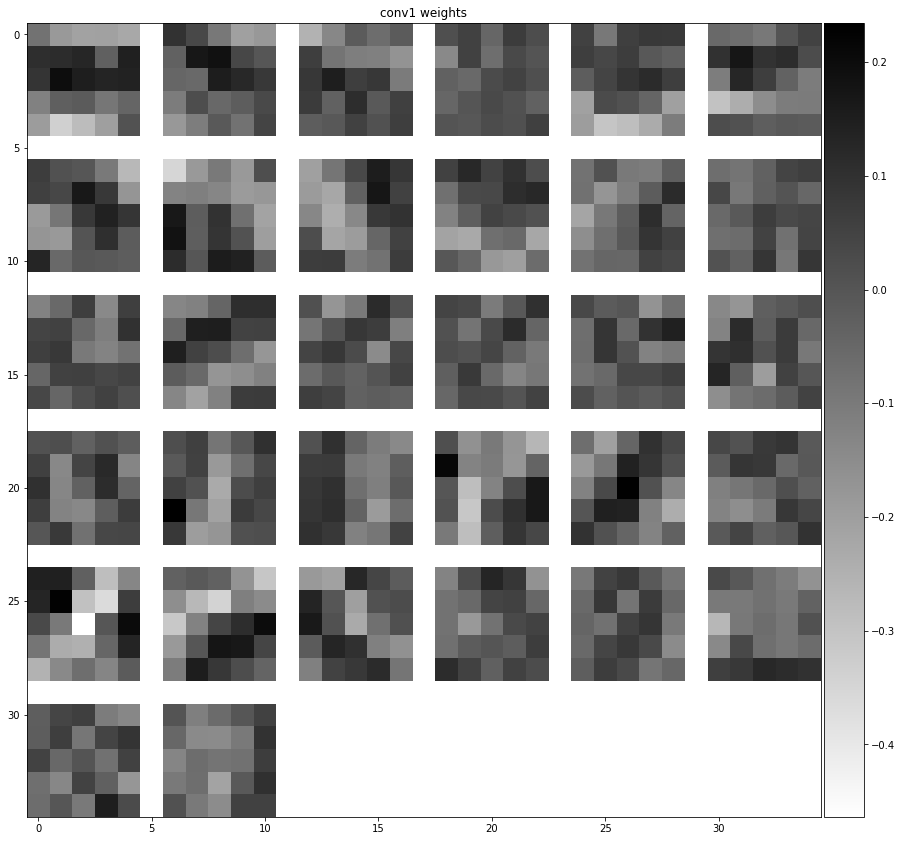

In [10]:
W = model.layers[0].get_weights()[0]
W = np.squeeze(W)

plt.figure(figsize=(15, 15))
plt.title('conv1 weights')
nice_imshow(plt.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)
plt.show()

* The first 8 weight matrices show some high weights toward the middle of the convolutions. This makes sense considering the number 3 has many distinguishing features toward the center of its shape.
* Many of the images show little weightage. These seem to correspond with many of the faint images in the convoluted image analyzation.
* A few of the kernels have strong weights along the bottom boundary and left boundary

### Covolutional Network 2
* Two convolutional layers
* One pooling layer
* One dense layer with 1000 nodes

In [11]:
model = Sequential()
first_layer = Conv2D(32, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', input_shape = (28, 28, 1))
model.add(first_layer)
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(64, (5, 5), activation = 'relu'))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = losses.categorical_crossentropy, optimizer = optimizers.Adam(), metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1276 - acc: 0.9610 - val_loss: 0.0455 - val_acc: 0.9843
Epoch 2/10
60000/60000 [==============================] - 127s 2ms/step - loss: 0.0386 - acc: 0.9884 - val_loss: 0.0317 - val_acc: 0.9897
Epoch 3/10
60000/60000 [==============================] - 128s 2ms/step - loss: 0.0235 - acc: 0.9927 - val_loss: 0.0310 - val_acc: 0.9898
Epoch 4/10
60000/60000 [==============================] - 128s 2ms/step - loss: 0.0196 - acc: 0.9937 - val_loss: 0.0302 - val_acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 128s 2ms/step - loss: 0.0148 - acc: 0.9952 - val_loss: 0.0282 - val_acc: 0.9918
Epoch 6/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0105 - acc: 0.9966 - val_loss: 0.0290 - val_acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0100 - acc: 0.9966 - val_loss: 0.0423 - 

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              4097000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 4,159,106
Trainable params: 4,159,106
Non-trainable params: 0
_________________________________________________________________


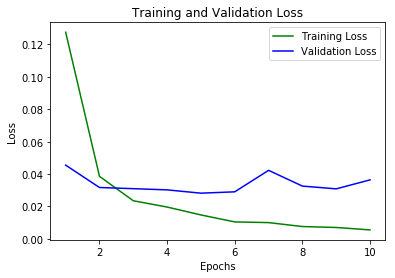

In [13]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 11)

plt.plot(epochs, loss_values, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

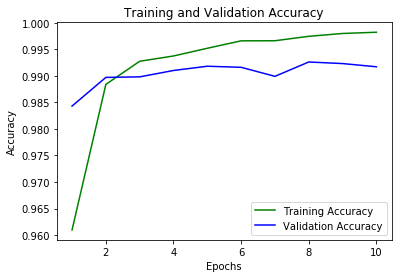

In [14]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
y_pred = model.predict_classes(x_test, batch_size = 128, verbose = 0)
y_pred_test = np.argmax(y_test, axis = 1)

confusion_matrix(y_pred_test, y_pred)

array([[ 978,    1,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    5, 1025,    0,    0,    0,    0,    2,    0,    0],
       [   0,    1,    2, 1000,    0,    5,    0,    0,    2,    0],
       [   0,    0,    0,    0,  979,    0,    0,    0,    0,    3],
       [   1,    0,    0,    4,    0,  882,    1,    0,    2,    2],
       [   2,    3,    0,    1,    5,    1,  944,    0,    2,    0],
       [   0,    5,    8,    1,    0,    0,    0, 1006,    1,    7],
       [   1,    0,    1,    0,    0,    1,    0,    1,  969,    1],
       [   0,    0,    0,    0,    7,    1,    0,    1,    1,  999]])

In [16]:
print(classification_report(y_pred_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### How many hidden layers are in this network?
In this model, there are 5 hidden layers. They are, in order, the first convolutional layer, the pooling layer, the second convolutional layer, the flattening layer, and the 1000-node dense layer.

### How many convolutions are calculated in each convolution layer?
The images are 28 x 28 pixels. Within the first convolutional layer, we specify a kernel size of 5 x 5 with a stride of 1 in each direction. This means that each image has a 5 x 5 box of pixels scanned, moving by 1 pixel after each scan. That 5 x 5 box scans 24 times in each direction, for a total of 576 calculations. Each of these caluclations are passed to the 32 output channels, for a total of 18,432 convolutions in the first layer. These convolutions are then passed to a pooling layer, working with the same logic, except a 2 x 2 box with a stride of 2. So those 32 24 x 24 grids are reduced to 32 12 x 12 grids for a total of 4,608 convolutions in the pooling layer. Those 32 channels are then fed into a second convolutional layer with a 5 x 5 kernel size and a stride of 1, reducing down to 8 x 8 grids passed to 64 output channels. So, the total number of convolutions in the second convolutional layer is 32 channels of 8 x 8 pixel images, passed to 64 output channels for a total of 131,072 convolutions.

### Run a test example through the model and print some of the convolved images from the first layer. Are any features from the image visible?

target: 4
predicted: 9


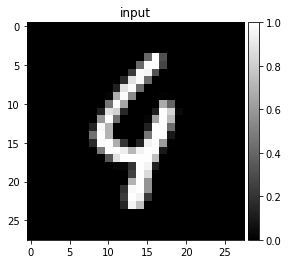

In [17]:
mis_idx = np.where(y_pred_test != y_pred)[0]

inputs = [K.learning_phase()] + model.inputs

_convout1_f = K.function(inputs, [first_layer.output])
    
i = mis_idx[0]

X = x_test[i:i+1]
print("target: {}".format(y_pred_test[i]))
print("predicted: {}".format(y_pred[i]))
X.reshape(28, 28)
plt.figure()
plt.title('input')
nice_imshow(plt.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.gray)
plt.show()

C1 shape:  (24, 24, 32)
32
(24, 24)


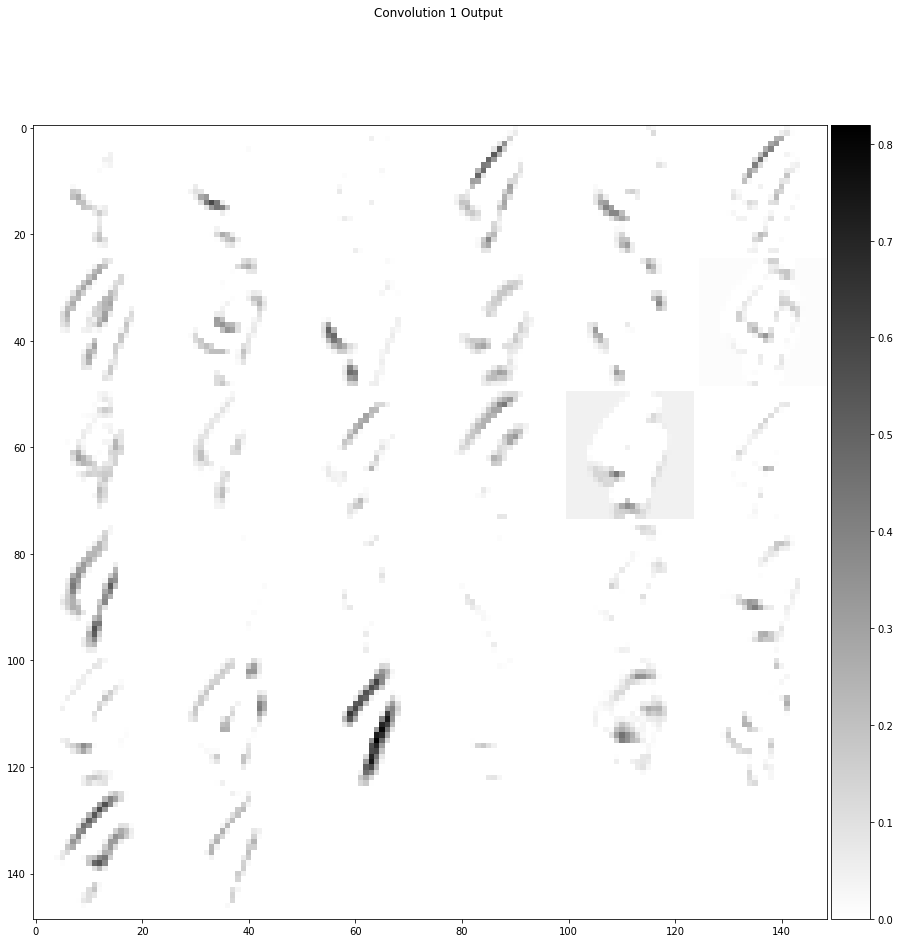

In [18]:
C1 = convout1_f(X)
C1 = np.squeeze(C1)
print("C1 shape: ", C1.shape)

plt.figure(figsize=(15, 15))
plt.suptitle('Convolution 1 Output')
nice_imshow(plt.gca(), make_mosaic(C1, 6, 6), cmap=cm.binary)
plt.show()

* The somewhat-vertical lines of the 4 seem to be the most prominent features
* The curved, rather than rigid, nature of this 4 are noticeable in these convolutions
* Some of these convolutions resemble a 9, which explains why the network misclassified this as a 9.
* Many of the convoluted images are very faint, which tells me they hold little weight in the identification of the number by distinguishing features

### Print a few convolution kernels. What kind of pattern is visible?

32
(5, 5)


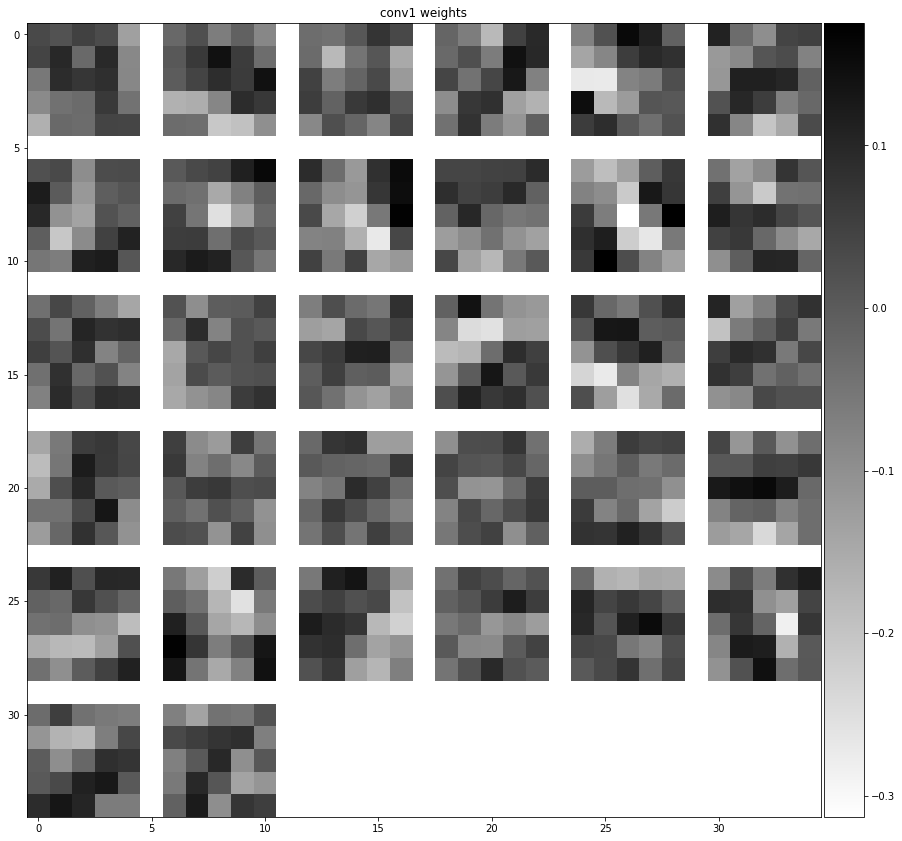

In [19]:
W = model.layers[0].get_weights()[0]
W = np.squeeze(W)

plt.figure(figsize=(15, 15))
plt.title('conv1 weights')
nice_imshow(plt.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)
plt.show()

* It seems as though most of these kernels have strong weights in the center
* There are a few kernels with strong weights in the center
* The convoluted images that appear very faint seem to correspond with kernels that have neutral weights